In [2]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from sklearn.impute import KNNImputer
#clp = "Crops and livestock products"
#fnu = "fertilizers by nutrient"

/Users/kalebalemayehu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/kalebalemayehu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [15]:
lnd_u = pd.read_csv('land_use.csv')
frst_l = pd.read_csv('forest_land.csv')
lnd_u = lnd_u.loc[(lnd_u['Flag'] == "A") | (lnd_u['Flag'] == "E")]
lnd_u.drop_duplicates()
frst_l = frst_l.loc[(frst_l['Flag'] == "A") | (frst_l['Flag'] == "E")]
frst_l.drop_duplicates()
lnd_u['agricultural_land(1000 ha)'] = lnd_u['Value']
frst_l['forest_land(1000 ha)'] = frst_l['Value']
del lnd_u['Value']
del frst_l['Value']

frst_l = frst_l[['Year', 'forest_land(1000 ha)']]
lnd_u = lnd_u[['Year', 'agricultural_land(1000 ha)']]
lnd_u

,Year,agricultural_land(1000 ha)
53,2014,18333
54,2015,18424
55,2016,18342
56,2017,18097
57,2018,18295
...,...,...
175,2016,11963
176,2017,11971
177,2018,11930
178,2019,11913


In [18]:

clp = pd.read_csv('fao_final.csv')
ngp = pd.read_csv('ngp_up.csv', sep = ",")
inel_p = pd.read_csv('industrial_elec_1998_2022.csv', sep = ",")
del inel_p['Unnamed: 2']
del clp['Unnamed: 0']
clp

,Year,Item,harvest_area (ha),tonnes,Yield(hg/ha)
0,1991,Apples,39200,780800.0,199184
1,1992,Apples,39200,1377800.0,351480
2,1993,Apples,39200,882400.0,225102
3,1994,Apples,36400,879500.0,241621
4,1995,Apples,36100,573300.0,158809
...,...,...,...,...,...
2140,2017,Wheat,3202600,24481600.0,76443
2141,2018,Wheat,3036300,20263500.0,66737
2142,2019,Wheat,3118100,23062600.0,73964
2143,2020,Wheat,2835500,22172100.0,78195


In [19]:
clp2 = clp.copy()
clp2 = clp2[clp2['Yield(hg/ha)'] != 0]

In [29]:
el_clp = (clp2.merge(ngp,on='Year').merge(inel_p,on='Year').merge(lnd_u,on='Year').merge(frst_l,on='Year'))#.merge(ngp, on='Year'))
el_clp.to_csv('master_data_soc.csv')
el_clp.columns

Index(['Year', 'Item', 'harvest_area (ha)', 'tonnes', 'Yield(hg/ha)',
       'Natural gas supply to industrial consumers - (Cents/kWh)',
       'Energy Price( cents per kilowatt hour)', 'agricultural_land(1000 ha)',
       'forest_land(1000 ha)'],
      dtype='object')

In [26]:
prod = "Apples"

In [27]:
corr_check = el_clp[['Year','Item', 'harvest_area (ha)', 'tonnes', 'Yield(hg/ha)',
       'Natural gas supply to industrial consumers - (Cents/kWh)',
       'Energy Price( cents per kilowatt hour)', 'agricultural_land(1000 ha)',
       'forest_land(1000 ha)']]

corr_check_prod = corr_check[corr_check['Item'] == prod]

/var/folders/l4/pbw5dk1139gdk7nt6gdt2yp40000gn/T/ipykernel_1470/1528973853.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(corr_check_prod.corr(method='pearson'), annot=True)


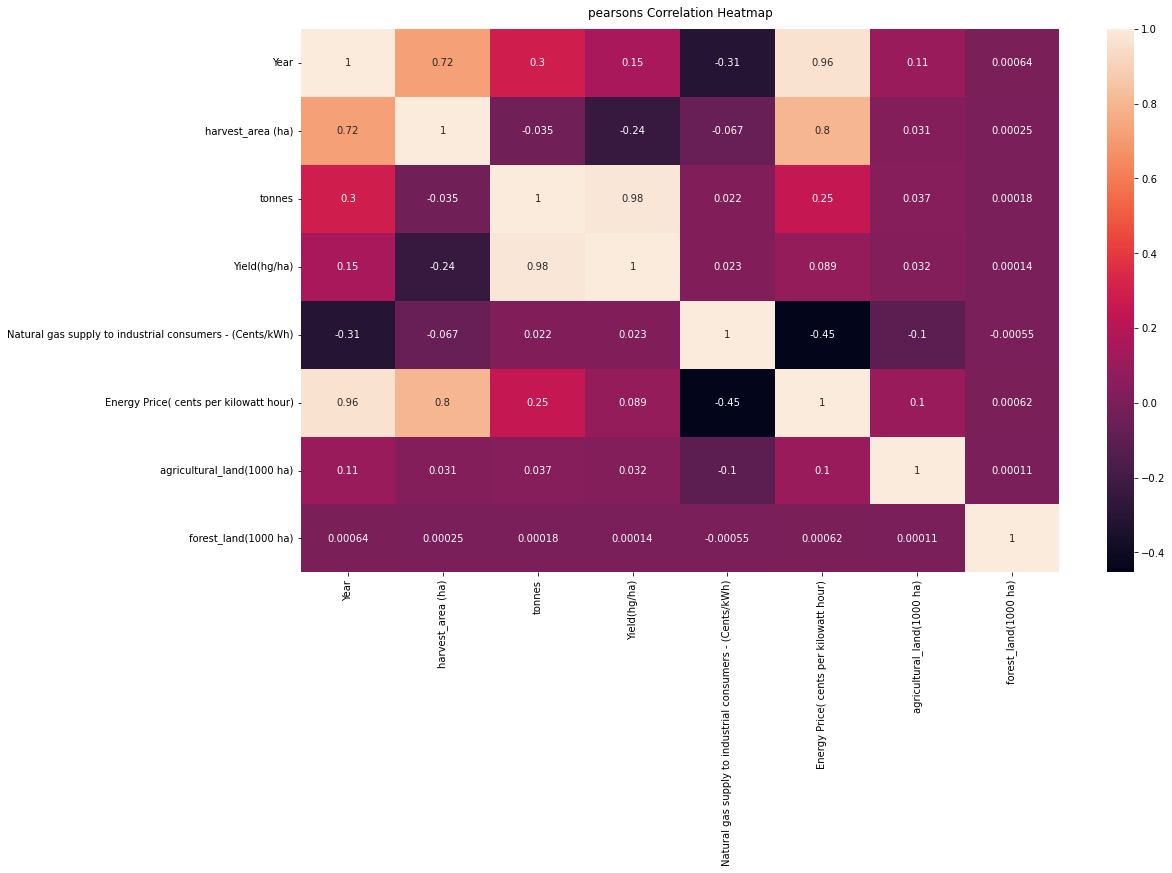

In [28]:
plt.figure(figsize=(17, 10))
heatmap = sns.heatmap(corr_check_prod.corr(method='pearson'), annot=True)
heatmap.set_title('pearsons Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

/var/folders/l4/pbw5dk1139gdk7nt6gdt2yp40000gn/T/ipykernel_4050/633587655.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(el_clp3.corr(method='kendall'), annot=False)


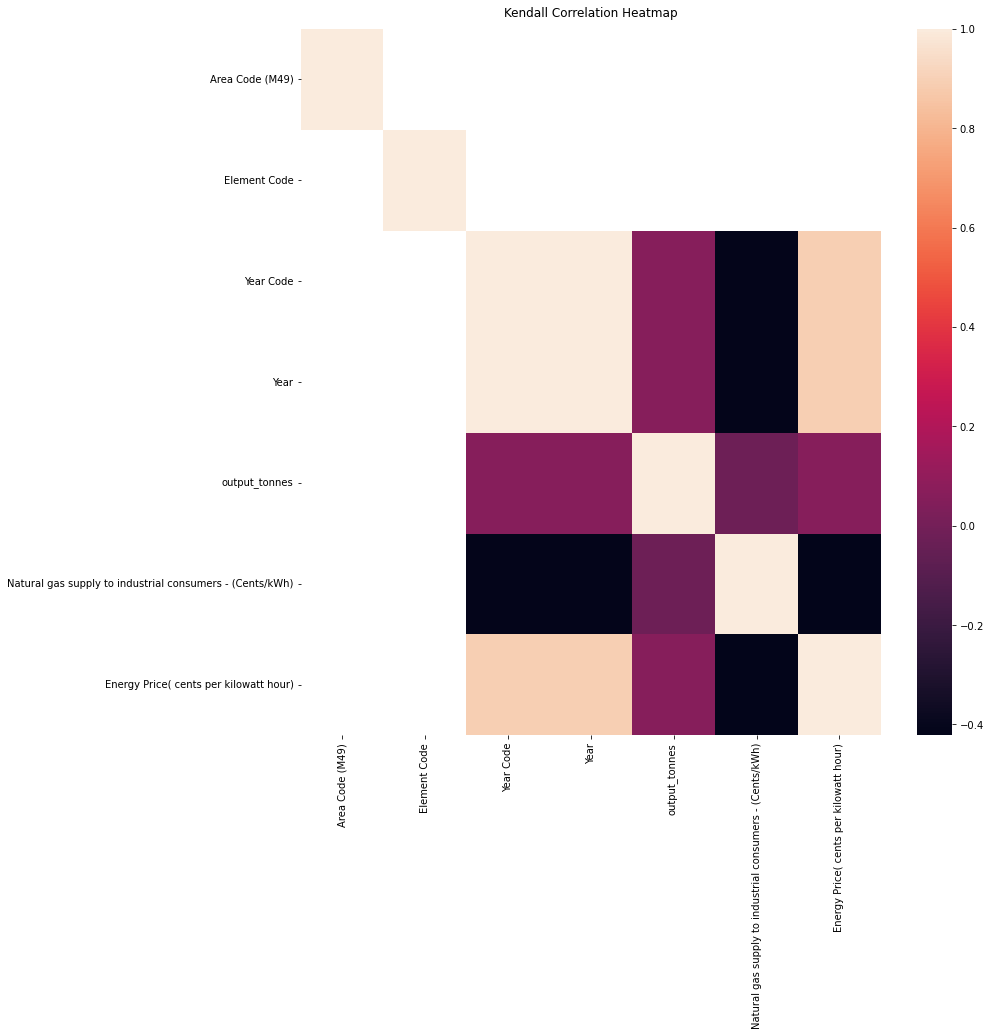